# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Use one Sample City to reference API


city = "oriximina"
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'

response = requests.get(city_url).json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': -1.7656, 'lon': -55.8661},
 'dt': 1712003243,
 'id': 3393471,
 'main': {'feels_like': 36.7,
          'grnd_level': 1004,
          'humidity': 61,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 31.71,
          'temp_max': 31.71,
          'temp_min': 31.71},
 'name': 'Oriximiná',
 'sys': {'country': 'BR', 'sunrise': 1711964656, 'sunset': 1712008186},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 84, 'gust': 2.08, 'speed': 1.31}}


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palikir - national government center
Processing Record 2 of Set 1 | oriximina
Processing Record 3 of Set 1 | la passe
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | atafu village
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | bam
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | uglegorsk
Pro

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          614
Lat           614
Lng           614
Max Temp      614
Humidity      614
Cloudiness    614
Wind Speed    614
Country       614
Date          614
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palikir - national government center,6.9248,158.1611,28.41,79,75,3.09,FM,1711999502
1,oriximina,-1.7656,-55.8661,31.71,61,95,1.31,BR,1711964656
2,la passe,45.5549,-0.8967,11.66,76,50,9.45,FR,1711950188
3,jamestown,42.0970,-79.2353,14.45,53,0,5.14,US,1711969115
4,atafu village,-8.5421,-172.5159,29.35,74,16,5.71,TK,1712079181


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palikir - national government center,6.9248,158.1611,28.41,79,75,3.09,FM,1711999502
1,oriximina,-1.7656,-55.8661,31.71,61,95,1.31,BR,1711964656
2,la passe,45.5549,-0.8967,11.66,76,50,9.45,FR,1711950188
3,jamestown,42.0970,-79.2353,14.45,53,0,5.14,US,1711969115
4,atafu village,-8.5421,-172.5159,29.35,74,16,5.71,TK,1712079181


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

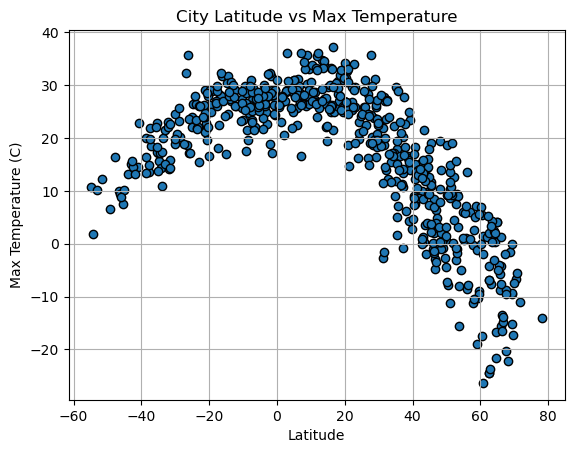

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

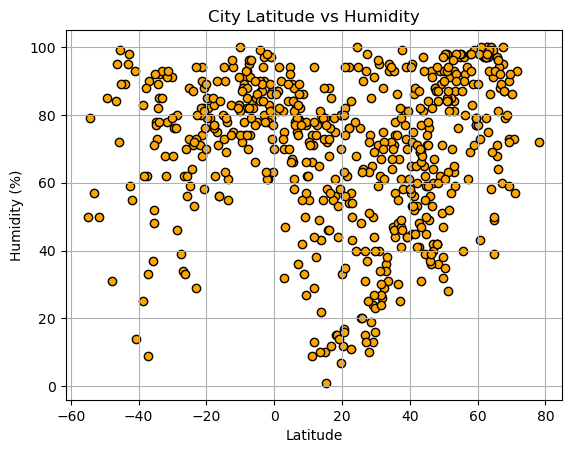

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors="black", c = "orange")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

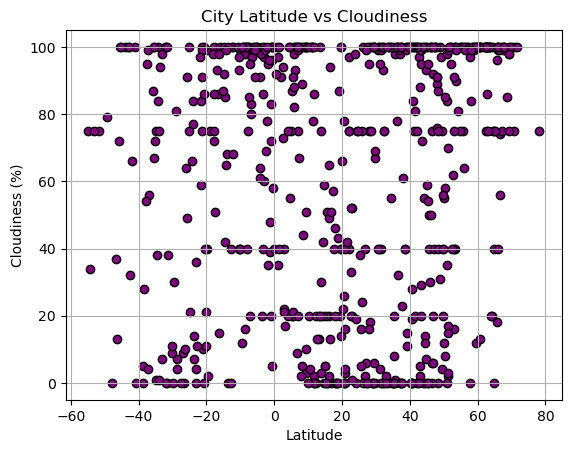

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black", c = "purple")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

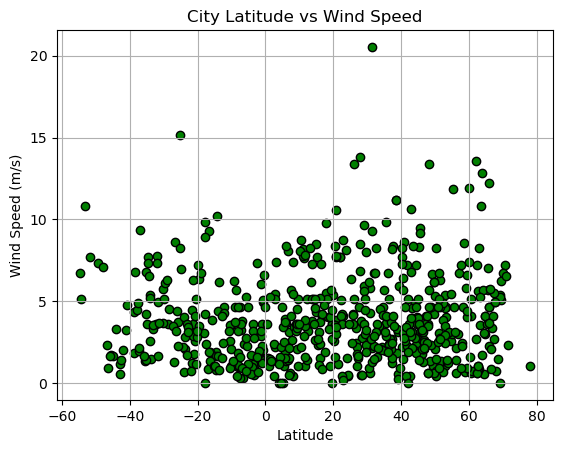

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black", c = "green")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def regress(x,y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    regress_values = slope * x + intercept
    line_fit = f'y = {round(slope,2)}x + {round(intercept,2)}'
    return regress_values, line_fit, rvalue



In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palikir - national government center,6.9248,158.1611,28.41,79,75,3.09,FM,1711999502
2,la passe,45.5549,-0.8967,11.66,76,50,9.45,FR,1711950188
3,jamestown,42.0970,-79.2353,14.45,53,0,5.14,US,1711969115
7,ribeira grande,38.5167,-28.7000,16.54,77,40,11.18,PT,1711957138
10,bam,29.1060,58.3570,16.41,50,100,9.65,IR,1711936562


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,oriximina,-1.7656,-55.8661,31.71,61,95,1.31,BR,1711964656
4,atafu village,-8.5421,-172.5159,29.35,74,16,5.71,TK,1712079181
5,bredasdorp,-34.5322,20.0403,17.38,73,38,7.70,ZA,1711947141
6,blackmans bay,-43.0167,147.3167,15.07,95,100,1.15,AU,1712003284
8,west island,-12.1568,96.8225,25.99,94,100,4.63,CC,1712014619


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.872294068074804


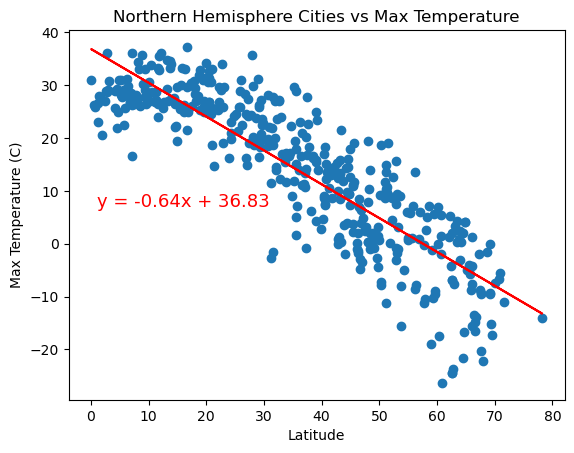

In [19]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (1,7), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Northern Hemisphere Cities vs Max Temperature")
plt.show()

The r value is: 0.7527570261178802


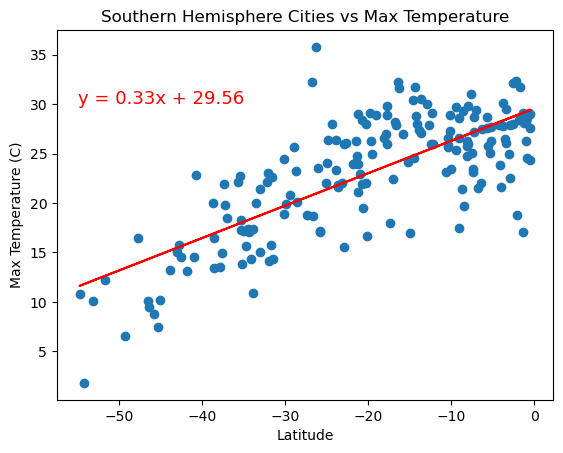

In [20]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (-55,30), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Southern Hemisphere Cities vs Max Temperature")
plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere have a r value between the absolute value of 0.7 and 0.9, which expresses that there is a strong relationship between latitude and max temperature. The linear trend from this relationship is that the closer the location is to the equator (latitude 0) the higher the temperature. This makes sense considering that the equator is hit by the sun's rays directly and therefore leads to warmer overall temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.2630998923823286


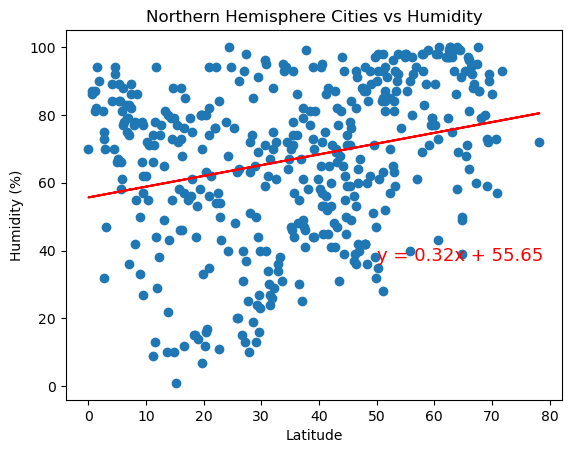

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (50,37), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Cities vs Humidity")
plt.show()

The r value is: 0.30994211343208267


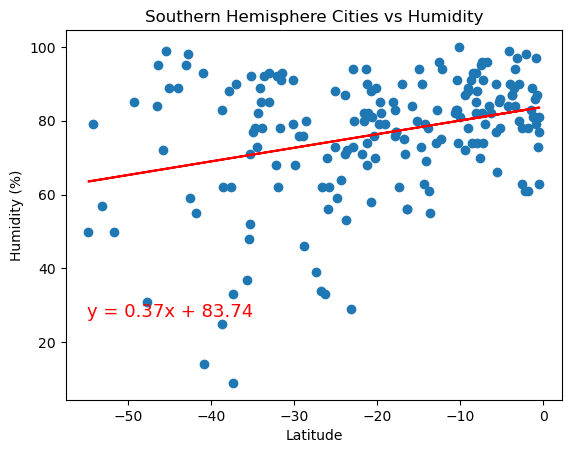

In [22]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (-55,27), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Cities vs Humidity")
plt.show()

**Discussion about the linear relationship:** The scatterplots of latitude compared to humidity have a weak correlation in both the Southern and Northern Hemispherve, with r values close to the absolute value of 0.3. This shows that the humidity of a place is not strongly associated with the position a location is to the equator. However, as mentioned in the temperature scatter plots, locations near the equator are typically warmer, which could influence the humidity levels and potentially explain this weak relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.25493439502921655


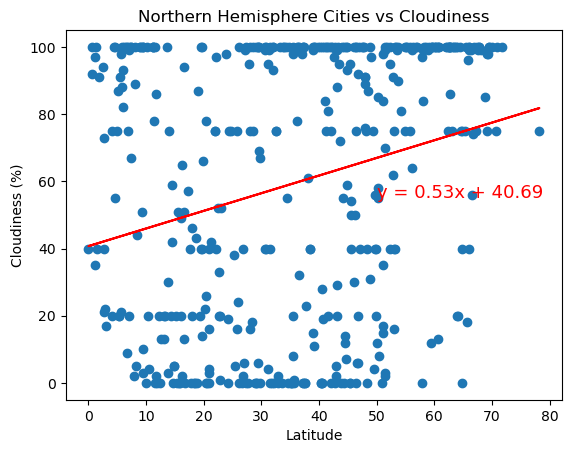

In [23]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (50,55), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cities vs Cloudiness")
plt.show()

The r value is: 0.24117656435828808


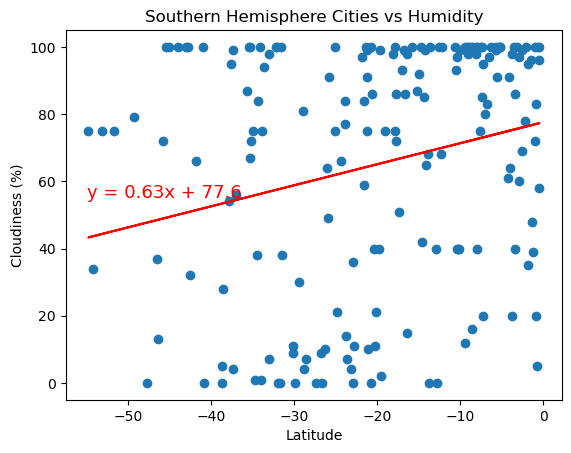

In [24]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (-55,55), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Cities vs Humidity")
plt.show()

**Discussion about the linear relationship:** The r value between cloudiness and latitude for both the Southern and Northern Hemishphere are near the absolute value of 0.25. This suggests there is a weak relationship between these two variables. Therefore, a location's latitude is not a good predictor for determing the cloudiness of the location, but its slightly denser closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.03858916711696


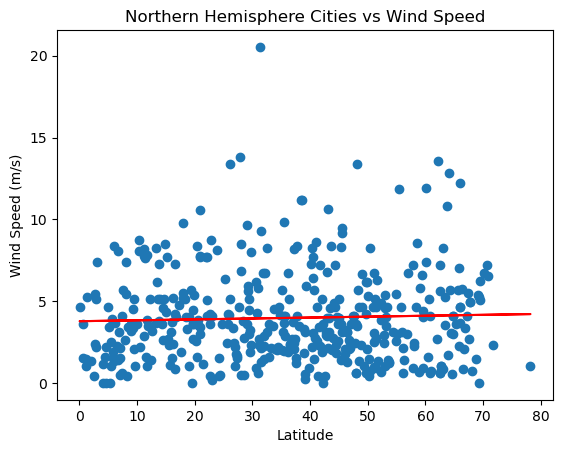

In [25]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (50,37), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere Cities vs Wind Speed")
plt.show()

The r value is: -0.278894367072451


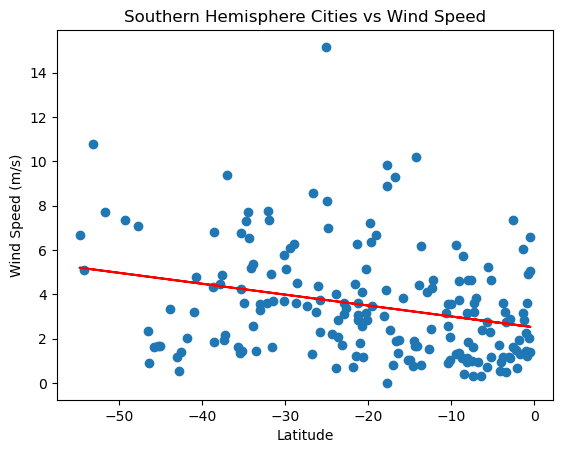

In [26]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (50,37), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere Cities vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere there is basically no relationship between wind speed of a location and its latitude. However, in the southern hemisphere there is a negative relationship with a weak association (r value of -.28). Suggesting, there is a slight decrease of wind as you get closer to the equator. Maybe its due to higher chances of tropical storms near the equator, however unsure why this is not replicated in the north.